In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import os
import ROOT

from helper import *


Welcome to JupyROOT 6.24/00


In [12]:
#df_heightcut_accumulate.to_pickle('s011_f00001_ts1520181395-2000_15500_maxheightcut.pkl')
df_heightcut_accumulate = pd.read_pickle('raw/s011_f00001_ts1520181395-2000_15500_maxheightcut.pkl')

df_heightcut_accumulate = df_heightcut_accumulate[df_heightcut_accumulate.maxheight < 15000]

#df_heightcut_accumulate = df_heightcut_accumulate[df_heightcut_accumulate.maxheight < 10000]
#df_heightcut_accumulate = df_heightcut_accumulate[df_heightcut_accumulate.maxheight > 5000]

### Spectrum Comparison

In [7]:
psd = np.asarray(df_heightcut_accumulate['psd'])
area = np.asarray(df_heightcut_accumulate['area'])

psd_calcs = np.asarray([])
area_calcs = np.asarray([])

#for index, row in df_heightcut_accumulate_normalized.iterrows(): 
for index, row in df_heightcut_accumulate.iterrows(): 
    y = np.asarray(row[5])
    x = np.arange(len(y))
    
    # remove the baseline
    baselinearray = y[0:np.argmax(y)-5]
    baseline = np.mean(baselinearray)
    y = y-baseline
    
    psdcalc = get_PSD_discretepts(x, y)
    areacalc = get_total_area_discretepts(x, y)
    
    psd_calcs = np.append(psd_calcs, psdcalc)
    area_calcs = np.append(area_calcs, areacalc)
    

/home/alexwen/clipping_analysis/helper.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  return tail/total


In [8]:
psdhist = ROOT.TH1F('psd','psd',50,0.0,0.3)
psdhist_calc = ROOT.TH1F('psdcalc','psdcalc',50,0.0,0.3)

areahist = ROOT.TH1F('area','area',50,0.0,150000)
areahist_calc = ROOT.TH1F('areacalc','areacalc',50,0.0,150000)

for i in range(len(psd_calcs)): 
    psdhist.Fill(psd[i])
    psdhist_calc.Fill(psd_calcs[i])
    
    areahist.Fill(area[i])
    areahist_calc.Fill(area_calcs[i])

Warning in <TROOT::Append>: Replacing existing TH1: psd (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: psdcalc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: area (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: areacalc (Potential memory leak).


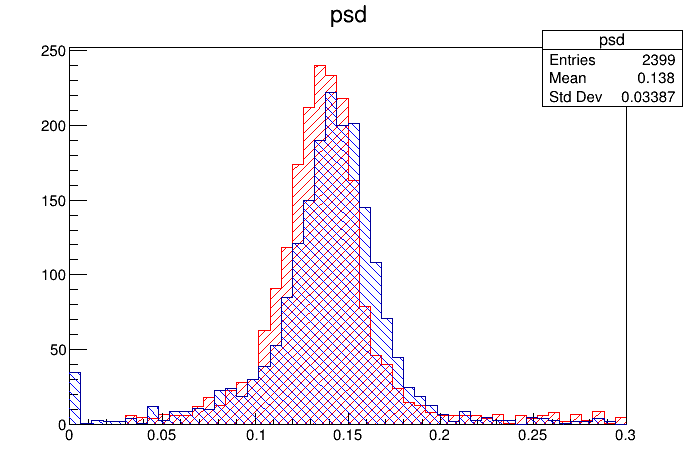

In [9]:
c = ROOT.TCanvas()

psdhist.SetFillStyle( 3354)
psdhist_calc.SetFillStyle( 3345)
psdhist.SetFillColor(2) #red
psdhist_calc.SetFillColor(4) #blue
psdhist.SetLineColor(2)

psdhist.Draw()
psdhist_calc.Draw('same')

c.Draw()

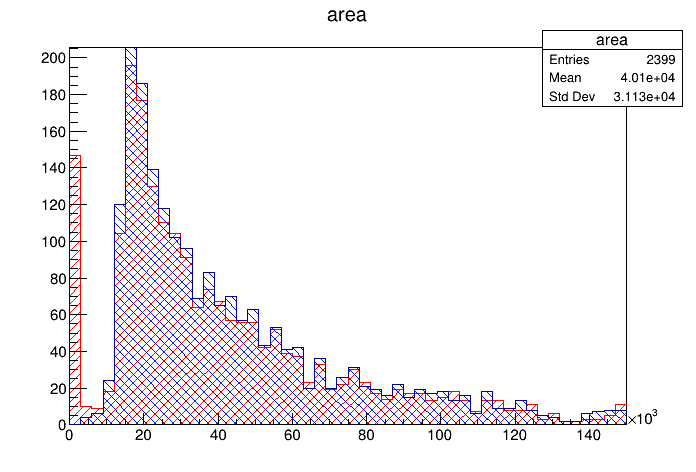

In [10]:
c2 = ROOT.TCanvas()

areahist.SetFillStyle( 3354)
areahist_calc.SetFillStyle( 3345)
areahist.SetFillColor(2) # red
areahist_calc.SetFillColor(4) #blue
areahist.SetLineColor(2)

areahist.Draw()
areahist_calc.Draw('same')

c2.Draw()

59

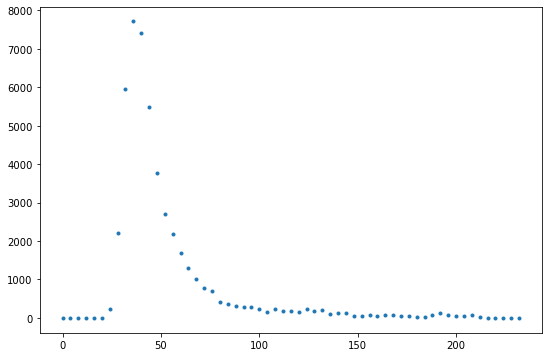

In [20]:
testpulse = np.asarray(df_heightcut_accumulate['pulse'])[1]
x = np.arange(len(testpulse))*4
plt.plot(x,testpulse, linestyle='', marker='.')


len(y)

In [12]:
testpulse

array([   4,    1,    1,   -2,    0,    1,  222, 2206, 5955, 7712, 7404,
       5481, 3766, 2697, 2187, 1701, 1290, 1012,  777,  692,  412,  369,
        314,  286,  274,  220,  157,  230,  179,  184,  162,  226,  183,
        202,   98,  128,  118,   51,   52,   69,   47,   69,   81,   54,
         41,   36,   36,   88,  118,   73,   51,   50,   65,   28,    0,
          0,    0,    0,    0], dtype=int16)

In [13]:
a = np.asarray([1,2,3,4,5,6,7,8])


In [14]:
get_time_index(x, testpulse)
get_total_area_discretepts(x, testpulse)

185752.0

### Constructing a high-energy template waveform

In [18]:
df_heightcut_accumulate_normalized = df_heightcut_accumulate.copy()

# normalize ish so waveforms are on the same scale
df_heightcut_accumulate_normalized['pulse']=df_heightcut_accumulate_normalized['pulse'].multiply(15000/df_heightcut_accumulate_normalized['maxheight'], axis="index")

# get rid of secondary peak events
ctr = 0
for index, row in df_heightcut_accumulate_normalized.iterrows():
    
    if np.amax(row[5][25:len(row[5])]) > 3000: 
        
        ctr = ctr+1
        
        df_heightcut_accumulate_normalized.drop([index], inplace=True)
        #df_heightcut_accumulate_normalized.at[index,'pulse'] = np.zeros(len(row[5]))
        
        print('index dropped: '+str(index))
        #print(str(row[5][25:len(row[5])]))
        
print('total removed: '+str(ctr))
   
# normalize again    
df_heightcut_accumulate_normalized['maxheight'] = list(np.amax(j) for j in df_heightcut_accumulate_normalized['pulse'])
#df_heightcut_accumulate_normalized['pulse']=df_heightcut_accumulate_normalized['pulse'].multiply(15000/df_heightcut_accumulate_normalized['maxheight'], axis="index")  
df_heightcut_accumulate_normalized['pulse']=df_heightcut_accumulate_normalized['pulse'].multiply(df_heightcut_accumulate_normalized['maxheight']/15000, axis="index") 


index dropped: 997172
index dropped: 2914053
index dropped: 3578131
index dropped: 4513623
index dropped: 4913459
index dropped: 906718
index dropped: 3990580
index dropped: 4956213
index dropped: 2724476
index dropped: 456060
index dropped: 3051464
index dropped: 2723925
index dropped: 3949523
index dropped: 3949705
index dropped: 4783862
index dropped: 5391809
index dropped: 5437835
total removed: 17


In [19]:
wow = sum(list(np.asarray(df_heightcut_accumulate_normalized['pulse'])))
wow = wow/len(list(np.asarray(df_heightcut_accumulate_normalized['pulse'])))

In [20]:
# get stddev
st = np.asarray(df_heightcut_accumulate_normalized['pulse'])
st = np.stack(st)
stdev = np.std(st, axis=0)

<ipython-input-21-3032b83fdab4>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(xtemplate, ytemplate, 'k-', color='blue')


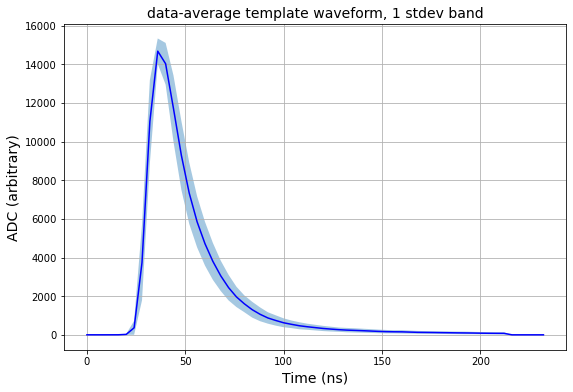

In [21]:
xtemplate = np.arange(len(wow))*4 # *4 to convert to ns
ytemplate = wow

plt.plot(xtemplate, ytemplate, 'k-', color='blue')
#plt.plot(np.arange(len(wow))*4, wow, color='red', linestyle='', marker='.')
plt.fill_between(xtemplate, ytemplate+stdev, ytemplate-stdev, alpha=0.4)
#plt.fill_between(np.arange(len(wow))*4, wow+2*stdev, wow-2*stdev, alpha=0.3, color='blue')
plt.grid()
plt.xlabel('Time (ns)',fontsize=14); plt.ylabel('ADC (arbitrary)',fontsize=14)
plt.title('data-average template waveform, 1 stdev band', fontsize=14)
plt.rcParams["figure.figsize"] = (9,6)

In [8]:
psd = get_PSD_discretepts(xtemplate, ytemplate)
psd_high = get_PSD_discretepts(xtemplate, ytemplate+stdev)
psd_low = get_PSD_discretepts(xtemplate, ytemplate-stdev)

area = get_total_area_discretepts(xtemplate, ytemplate)
area_high = get_total_area_discretepts(xtemplate, ytemplate+stdev)
area_low = get_total_area_discretepts(xtemplate, ytemplate-stdev)

In [9]:
print('PSD: '+str(psd)+' [' + str(psd_low) + ', ' + str(psd_high) + ']')
print('area: '+str(area)+' [' + str(area_low) + ', ' + str(area_high) + ']')

PSD: 0.14151298050916444 [0.10489763596785324, 0.16514664265151902]
area: 406595.402742409 [325062.43839790934, 488128.3670869089]


In [ ]:
# idea #1: treat the original, original+/- stdev waveforms as 3 separate ones, and perform the toy analysis on it
# come up with a uncertainty band for the PSD and energy calculation 
# idea #2: for each datapoint, get an uncertainty on the area (easy) and the PSD (maxtail/mintotal) to (mintail/maxtotal)

### Compare to the Template Waveform

In [12]:
templatefile = ROOT.TFile.Open('templates/AD_Templates.root',"READ")
graph_early = templatefile.Get("gPSD_Template_3_0")

temp_x, temp_y = get_xy_from_TGraph(graph_early)

In [5]:
xshift = -30
xscale = 1
yscale = np.amax(temp_y)/np.amax(wow) 

NameError: name 'wow' is not defined

In [ ]:
xparam = np.arange(len(wow))*4 * xscale + xshift
yparam = wow*yscale

plt.plot(temp_x, temp_y)
plt.plot(xparam, yparam, marker='.')

plt.xlim(-50, 250)
plt.grid()

### Quick Visualization of Individual Events

In [3]:
largelist = list(df_heightcut_accumulate.event_number)
largelist = set(largelist)
largelist = np.sort(list(largelist))

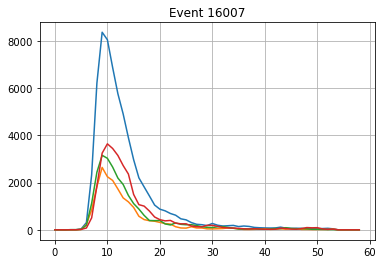

In [4]:
index = 104

en = largelist[index]

df_oneevent = df_heightcut_accumulate[df_heightcut_accumulate.event_number == en]

for index, row in df_oneevent.iterrows():
    if np.amax(row[5]): 
        plt.plot(row[5])

plt.title('Event '+str(en))
plt.grid()